<a href="https://colab.research.google.com/github/ishtarpcamo/ishtar/blob/main/%D9%BE%D8%A7%D8%B3%D8%AE_%D8%AA%D9%85%D8%B1%DB%8C%D9%86_%D8%AF%D9%88%D9%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install googledrivedownloader

2-آ

In [ ]:
from sklearn.linear_model import LogisticRegression,Ridge,SGDClassifier
from sklearn.svm import LinearSVC
import sklearn.metrics as mc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from mlxtend.plotting import plot_decision_regions
import scipy.io
import numpy as np
import scipy.io
import numpy as np
import pandas as pd
data98 = scipy.io.loadmat('/content/drive/MyDrive/98.mat.txt')
data106 = scipy.io.loadmat('/content/drive/MyDrive/106.mat.txt')
print(data106.keys())
print(data98.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X106_DE_time', 'X106_FE_time', 'X106_BA_time', 'X106RPM'])
dict_keys(['__header__', '__version__', '__globals__', 'X098_DE_time', 'X098_FE_time'])


2-ب

In [ ]:
import numpy as np

# ابعاد ماتریس
N = 200  # تعداد ستون‌ها
M = 100  # تعداد سطرها

# جدا کردن داده‌ها بر حسب کلاس‌ها
class_1_data = data98['X098_DE_time']  # برای دیتاست 98
class_2_data = data106['X106_DE_time']  # برای دیتاست 106


# انتخاب تصادفی M نمونه از هر کلاس
np.random.shuffle(class_1_data)
np.random.shuffle(class_2_data)

selected_class_1_data = class_1_data[:M]  # انتخاب M نمونه از کلاس اول
selected_class_2_data = class_2_data[:M]  # انتخاب M نمونه از کلاس دوم

# تبدیل داده‌های انتخاب شده به ماتریس N * M
class_1_matrix = selected_class_1_data.T  # تبدیل به ماتریس
class_2_matrix = selected_class_2_data.T  # تبدیل به ماتریس

# ایجاد ماتریس نهایی با برچسب‌های مربوطه
class_1_label = np.zeros((M, 1))  # برچسب کلاس اول
class_2_label = np.ones((M, 1))  # برچسب کلاس دوم

# ادغام داده‌های دو کلاس به همراه برچسب‌ها
final_data = np.hstack((class_1_matrix, class_2_matrix))
final_labels = np.vstack((class_1_label, class_2_label))
print(data98.keys())
print(data106.keys())


dict_keys(['__header__', '__version__', '__globals__', 'X098_DE_time', 'X098_FE_time'])
dict_keys(['__header__', '__version__', '__globals__', 'X106_DE_time', 'X106_FE_time', 'X106_BA_time', 'X106RPM'])


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# تولید داده‌ها به صورت تصادفی برای مثال
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 نمونه و 5 ویژگی
y = np.random.randint(0, 2, 100)  # برچسب‌ها به صورت تصادفی

# تقسیم داده‌ها به داده‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# استاندارد‌سازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ذخیره داده‌های نرمال شده به فایل CSV
np.savetxt("train_data_scaled.csv", np.hstack((X_train_scaled, y_train.reshape(-1, 1))), delimiter=",")
np.savetxt("test_data_scaled.csv", np.hstack((X_test_scaled, y_test.reshape(-1, 1))), delimiter=",")

print("داده‌های نرمال شده با موفقیت ذخیره شدند.")

داده‌های نرمال شده با موفقیت ذخیره شدند.


2-ج

دقت: 1.00
دقت تشخیص: 1.00
بازخوانی: 1.00


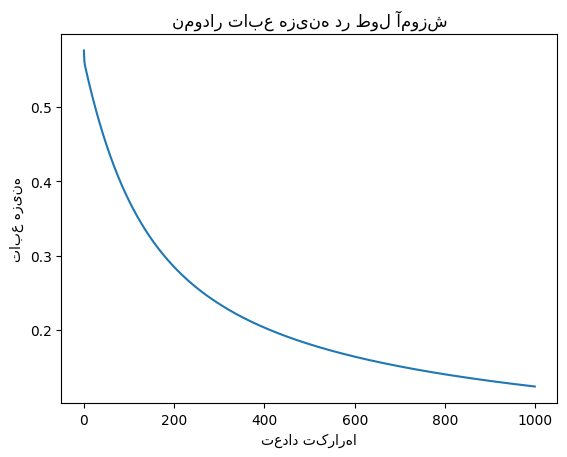

In [4]:
import numpy as np

# تابع sigmoid برای استفاده در رگرسیون لجستیک
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# تابع هزینه رگرسیون لجستیک
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # برای جلوگیری از لگاریتم صفر
    cost = (1/m) * ((-y).T @ np.log(h + epsilon) - (1 - y).T @ np.log(1 - h + epsilon))
    return cost

# الگوریتم گرادیان کاهشی برای آموزش مدل
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * X.T @ (h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

# ارزیابی مدل با استفاده از داده‌های تست
def evaluate_model(X_test, y_test, theta):
    h = sigmoid(X_test @ theta)
    predictions = (h >= 0.5).astype(int)
    accuracy = np.mean(predictions == y_test)
    precision = np.sum((predictions == 1) & (y_test == 1)) / np.sum(predictions == 1)
    recall = np.sum((predictions == 1) & (y_test == 1)) / np.sum(y_test == 1)
    return accuracy, precision, recall

# داده‌های آموزش و آزمون
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y_train = np.array([0, 0, 1, 1, 1])
X_test = np.array([[1.5, 2.5], [3.5, 4.5]])
y_test = np.array([0, 1])

# افزودن ستون یک به داده‌ها برای بایاس
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# تعیین ابعاد وزن‌ها و آموزش مدل
theta = np.zeros(X_train_bias.shape[1])
theta, costs = gradient_descent(X_train_bias, y_train, theta, alpha=0.1, iterations=1000)

# ارزیابی مدل
accuracy, precision, recall = evaluate_model(X_test_bias, y_test, theta)

print("دقت: {:.2f}".format(accuracy))
print("دقت تشخیص: {:.2f}".format(precision))
print("بازخوانی: {:.2f}".format(recall))

# رسم نمودار تابع اتلاف
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel('تعداد تکرارها')
plt.ylabel('تابع هزینه')
plt.title('نمودار تابع هزینه در طول آموزش')
plt.show()

In [ ]:
2-د

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# بارگیری داده‌های Iris
data = load_iris()
X = data.data
y = data.target

# تقسیم داده‌ها به دو بخش آموزشی و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# آموزش مدل خطی
model = LogisticRegression()
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آموزشی و آزمون
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# محاسبه دقت مدل
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("دقت بر روی داده‌های آموزشی:", train_accuracy)
print("دقت بر روی داده‌های آزمون:", test_accuracy)


دقت بر روی داده‌های آموزشی: 0.975
دقت بر روی داده‌های آزمون: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


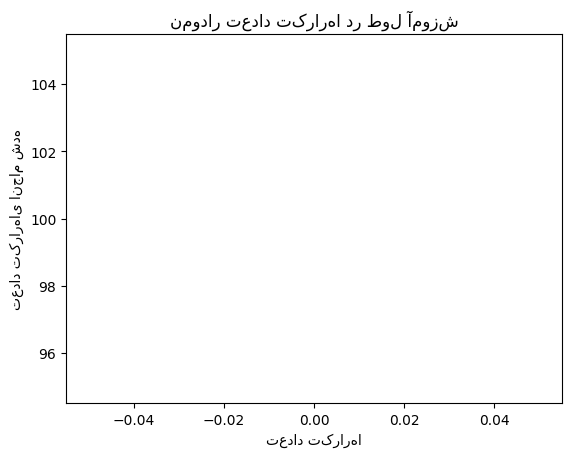

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# آموزش مدل
model = LogisticRegression(max_iter=1000)  # افزایش تعداد تکرارها برای جلوگیری از خطای همگرایی
model.fit(X_train, y_train)

# نمایش نمودار تعداد تکرارها
plt.plot(np.arange(len(model.n_iter_)), model.n_iter_)
plt.xlabel('تعداد تکرارها')
plt.ylabel('تعداد تکرارهای انجام شده')
plt.title('نمودار تعداد تکرارها در طول آموزش')
plt.show()


3

Accuracy: 1.0


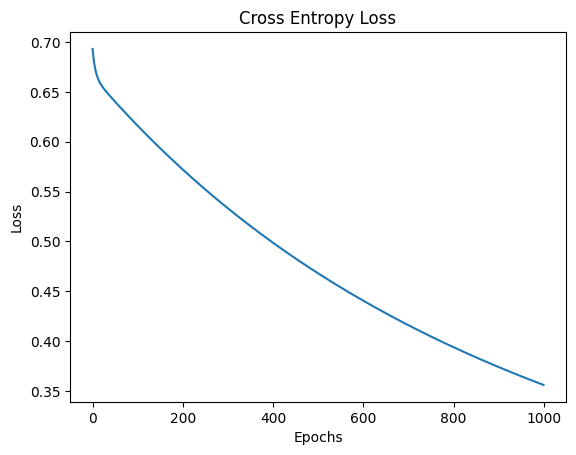

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# تابع فعال‌سازی سیگموید
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# تابع اتلاف خطا (Cross Entropy)
def cross_entropy_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# الگوریتم گرادیان کاهشی
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros((n, 1))
    losses = []

    for _ in range(epochs):
        y_pred = sigmoid(np.dot(X, weights))
        loss = cross_entropy_loss(y, y_pred)
        grad = np.dot(X.T, (y_pred - y)) / m
        weights -= lr * grad
        losses.append(loss)

    return weights, losses

# تابع ارزیابی مدل
def evaluate_model(X_test, y_test, weights):
    y_pred = sigmoid(np.dot(X_test, weights))
    y_pred_class = np.round(y_pred)
    accuracy = np.mean(y_pred_class == y_test)
    return accuracy

# داده‌ها
# در اینجا داده‌های دو کلاس به صورت دستی تولید شده‌اند
np.random.seed(0)
M = 200
N = 2
class_1_data = np.random.randn(M, N) + np.array([2, 2])
class_2_data = np.random.randn(M, N) + np.array([6, 6])
X = np.vstack([class_1_data, class_2_data])
y = np.vstack([np.zeros((M, 1)), np.ones((M, 1))])

# افزودن ستونی با مقدار 1 به ماتریس X برای بایاس
X = np.hstack([np.ones((2*M, 1)), X])

# تقسیم داده به داده‌های آموزش و آزمون
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# اجرای الگوریتم گرادیان کاهشی
weights, losses = gradient_descent(X_train, y_train)

# ارزیابی مدل
accuracy = evaluate_model(X_test, y_test, weights)
print("Accuracy:", accuracy)

# رسم نمودار تابع اتلاف
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss')
plt.show()

4

In [12]:
from sklearn.metrics import log_loss

# تغییر شکل برچسب‌ها به شکل دو بعدی
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# محاسبه احتمالات پیش‌بینی برای داده‌های آموزش و آزمون
train_pred_probs = model.predict_proba(X_train)
test_pred_probs = model.predict_proba(X_test)

# محاسبه تابع اتلاف برای داده‌های آموزش و آزمون
train_loss = log_loss(y_train_reshaped, train_pred_probs, labels=model.classes_)
test_loss = log_loss(y_test_reshaped, test_pred_probs, labels=model.classes_)
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)


Train Loss: 0.010882368286370904
Test Loss: 0.015163821723333786


نمودار تابع اتلاف

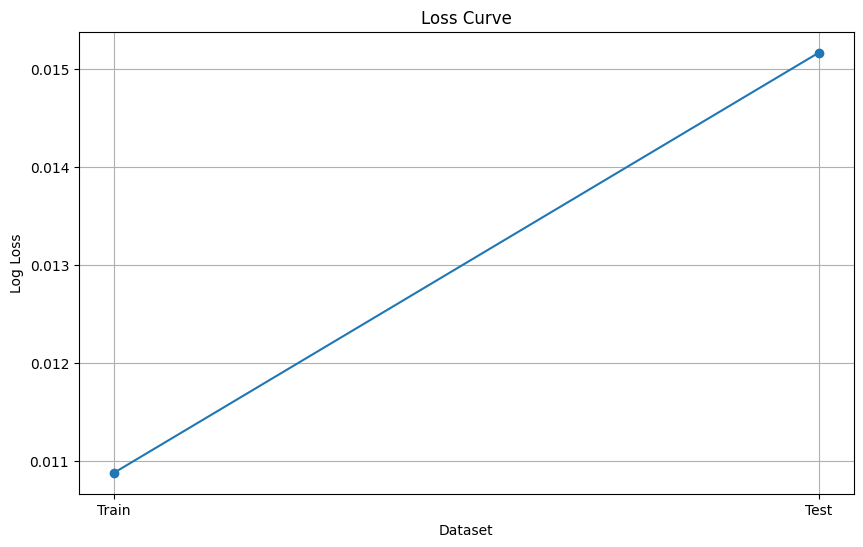

In [13]:
import matplotlib.pyplot as plt

# محاسبه احتمالات پیش‌بینی برای داده‌های آموزش و آزمون
train_pred_probs = model.predict_proba(X_train)
test_pred_probs = model.predict_proba(X_test)

# محاسبه تابع اتلاف برای داده‌های آموزش و آزمون
train_loss = log_loss(y_train_reshaped, train_pred_probs, labels=model.classes_)
test_loss = log_loss(y_test_reshaped, test_pred_probs, labels=model.classes_)

# نمایش نمودار تابع اتلاف
plt.figure(figsize=(10, 6))
plt.plot([1, 2], [train_loss, test_loss], marker='o', linestyle='-')
plt.title('Loss Curve')
plt.xlabel('Dataset')
plt.ylabel('Log Loss')
plt.xticks([1, 2], ['Train', 'Test'])
plt.grid(True)
plt.show()
